<a href="https://colab.research.google.com/github/MohanPatil1/DS-And-DA-Assignments/blob/main/Snews_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data set

In [4]:
import pandas as pd
data=pd.read_csv('NewspaperData.csv')
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


#Correlation

In [7]:
data.corr() #Check Daily vs Sunday

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


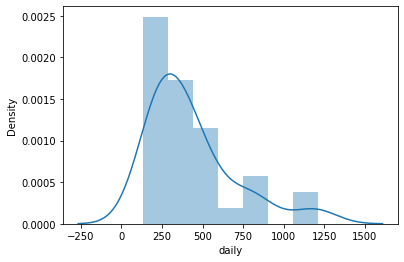

In [8]:
import seaborn as sns
sns.distplot(data['daily']) # density plot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


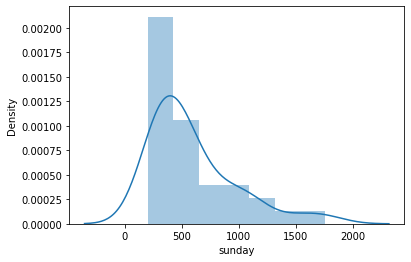

In [9]:
sns.distplot(data['sunday']) # density plot

# Fitting a Linear Regression Model

In [10]:
import statsmodels.formula.api as smf # Model=Regression model
model=smf.ols('sunday~daily',data=data).fit()#Ordinary least Squares, y=dependant variable-sunday 
                                            #dataset-data,fit() fit the regression line

In [11]:
#Coefficients are B0 and B1
model.params
#Req .Equn: Sunday=B0+B1*daily
#In output :Intercept-B0,daily -coefficent of daily i.e B1
#Sunday =13.83+1.33*daily
# we assumed daily circulation as 200
# So Sunday=13.83+1.33*200

Intercept    13.835630
daily         1.339715
dtype: float64

In [13]:
sun=13.83+1.33*200
sun

279.83

In [15]:
#R squared value - 0.92 -Good Reg Equation
model.rsquared,model.rsquared_adj

(0.9180596895873295, 0.9154990548869336)

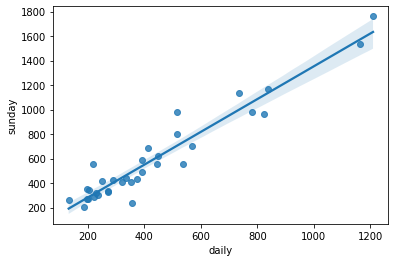

In [16]:
sns.regplot(x='daily',y='sunday',data=data)

In [17]:
#t and p-Values
print(model.tvalues, '\n' , model.pvalues)
#Focus on B1. B1 is slope . Define H0 and H1

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


# Predict for new data point

In [19]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])# x value is (daily circulation) 200 at one branch and 300 another branch

In [20]:
newdata

0    200
1    300
dtype: int64

In [21]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [22]:
data_pred

,daily
0,200
1,300


In [23]:
model.predict(data_pred)# Model - Regression model

0    281.778581
1    415.750057
dtype: float64